In [1]:
import pandas, seaborn, numpy

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# user-defined variables

In [4]:
merged_expression = '/Users/adrian/research/akureyri/results/distances/expression.tsv'
metadata_file = '/Users/adrian/research/akureyri/results/deseq2_pipeline/metadata.tsv'

# read info

In [5]:
metadata = pandas.read_csv(metadata_file, sep='\t', index_col=0)

In [6]:
df = pandas.read_csv(merged_expression, sep='\t', index_col=0)
df.drop(['symbol'], axis=1, inplace=True)
df.head()

,Normal_Cart_10_8,Normal_Cart_2_2,Normal_Cart_3_3,Normal_Cart_4_4,Normal_Cart_5_5,Normal_Cart_6_6,Normal_Cart_7_3,Normal_Cart_9_7,normal_01,normal_02,...,test03,test04,test05,test06,test07,test08,test09,test10,test11,test12
ENSG00000115414,16.277134,15.429753,15.428266,16.305868,14.635041,14.389434,15.410056,16.595074,15.680574,15.479558,...,144555.857795,136202.567499,158394.530440,263460.790473,99233.799586,114716.922365,156588.519228,267493.400498,87149.863743,134312.309349
ENSG00000105664,15.371944,14.515260,14.813281,14.776144,14.048698,12.793369,15.035222,16.146382,12.445524,11.820960,...,9.319409,2.316020,10.025530,0.969931,8.620417,7.731874,8.574195,4.977306,5.675533,4.031672
ENSG00000251562,15.441039,14.574888,15.053004,14.793931,14.773987,13.306750,14.967599,15.261263,15.153383,16.130006,...,496.839730,636.863456,698.497986,995.558126,751.705658,682.578360,633.723345,932.498768,589.426906,901.068743
ENSG00000064886,7.645584,5.860772,6.055734,8.496841,6.743966,6.479437,4.659511,6.882385,9.678269,15.533499,...,3.994119,8.475188,0.507806,3.747833,6.877326,16.206062,6.554350,11.482193,0.444921,15.134070
ENSG00000120885,15.105566,14.493329,14.849689,14.704724,15.092099,15.483067,14.591833,15.392971,13.750018,13.279954,...,3565.719528,5735.185955,5750.440648,8434.590269,3922.591202,9104.274777,2228.272470,4076.185218,1986.977753,3867.103432


# analysis

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_5393/1103580449.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=12)


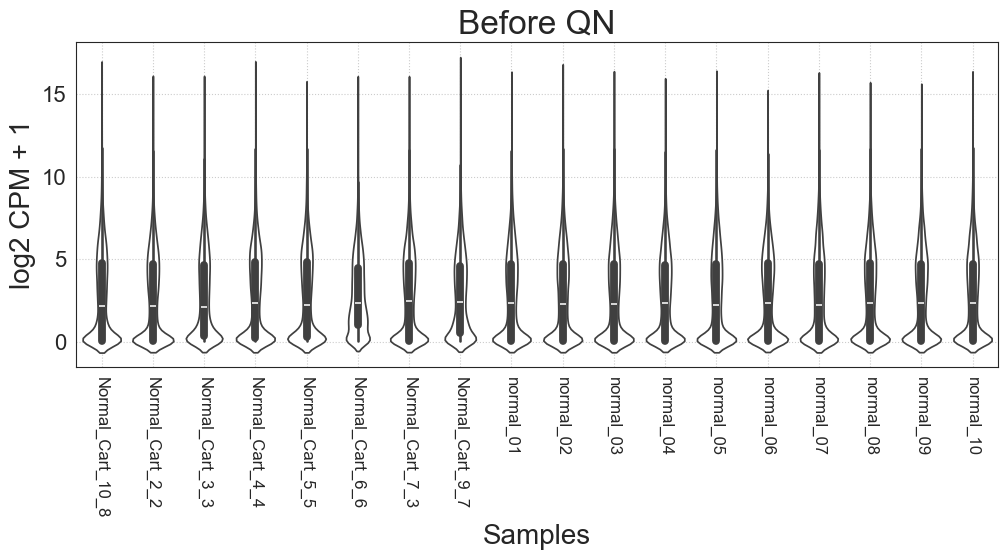

In [7]:
selected_columns = [column for column in df.columns if 'ormal' in column]
log2cpm = df[selected_columns]
cpm = 2**log2cpm
normal = numpy.log2(cpm + 1)
normal.head()

seaborn.set_style("white")
g = seaborn.violinplot(data=normal, color='white')
g.set(ylabel='log2 CPM + 1', xlabel='Samples', title='Before QN')
g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=12)
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_5393/268335448.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=12)


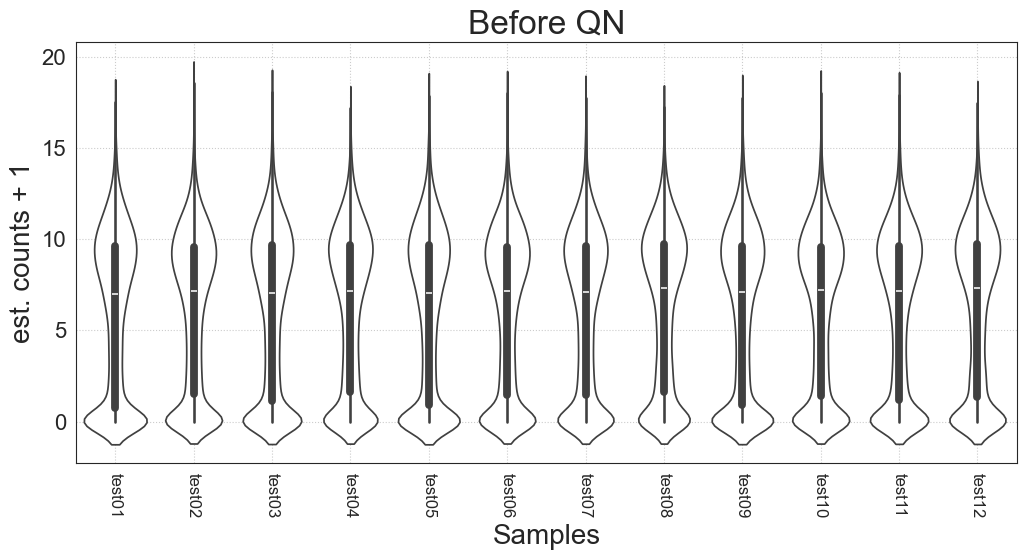

In [8]:
selected_columns = [column for column in df.columns if 'ormal' not in column]
cultures = numpy.log2(df[selected_columns] + 1)

g = seaborn.violinplot(data=cultures, color='white')
g.set(ylabel='est. counts + 1', xlabel='Samples', title='Before QN')
g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=12)
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [9]:
full = normal.join(cultures)

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_5393/1157682994.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=12)


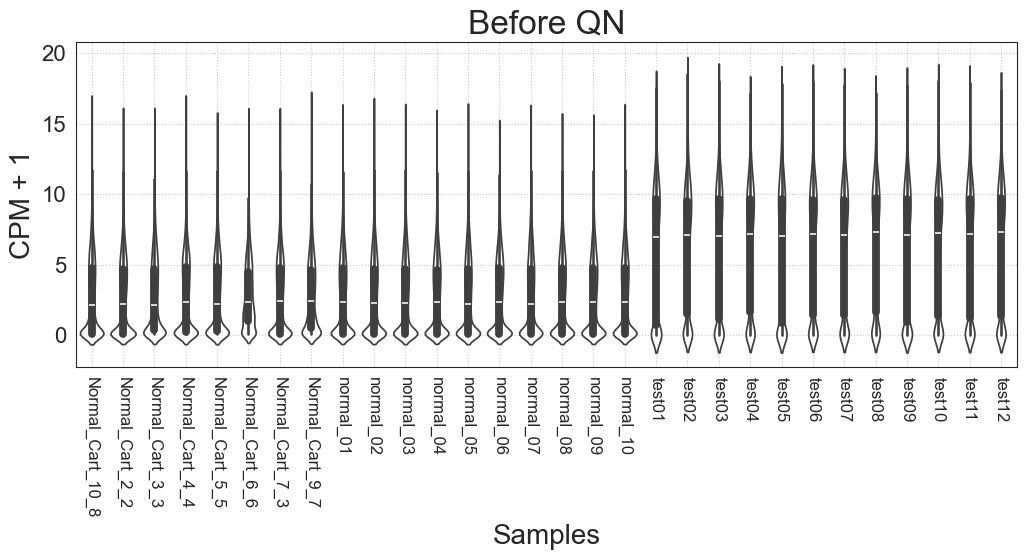

In [10]:
g = seaborn.violinplot(data=full, color='white')
g.set(ylabel='CPM + 1', xlabel='Samples', title='Before QN')
g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=12)
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# quantile normalization

In [11]:
###
### quantile normalization |  taken from https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/
###

# step 1/3: sorting sample values
df_sorted = pandas.DataFrame(numpy.sort(full.values, axis=0), 
                             index=full.index, 
                             columns=full.columns)
# step 2/3: averaging rank values across samples
df_mean = df_sorted.mean(axis=1)
df_mean.index = numpy.arange(1, len(df_mean) + 1)
# step 3/3: re-ordering samples
df_qn = full.rank(method="min").stack().astype(int).map(df_mean).unstack()

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_5393/1588532045.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=12)


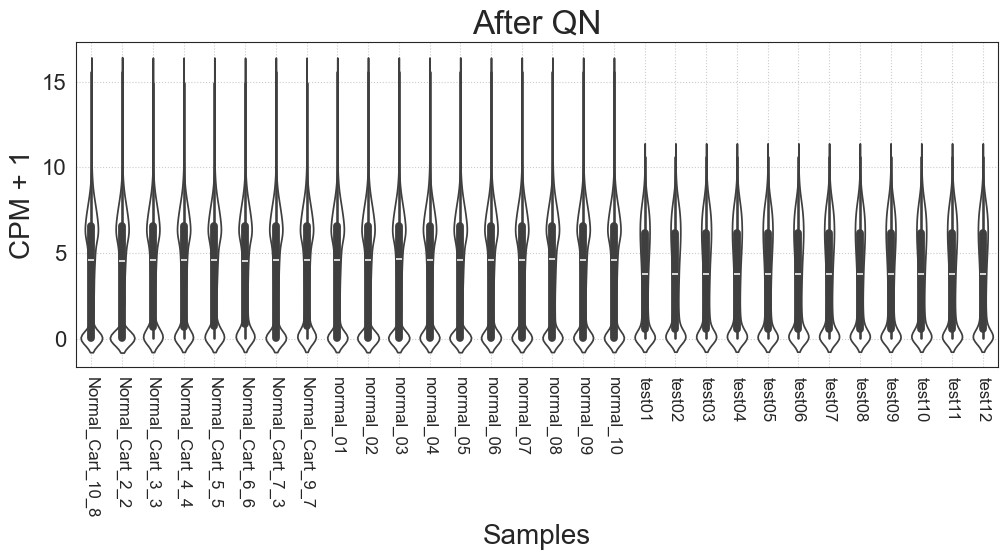

In [12]:
g = seaborn.violinplot(data=df_qn, color='white')
g.set(ylabel='CPM + 1', xlabel='Samples', title='After QN')
g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=12)
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

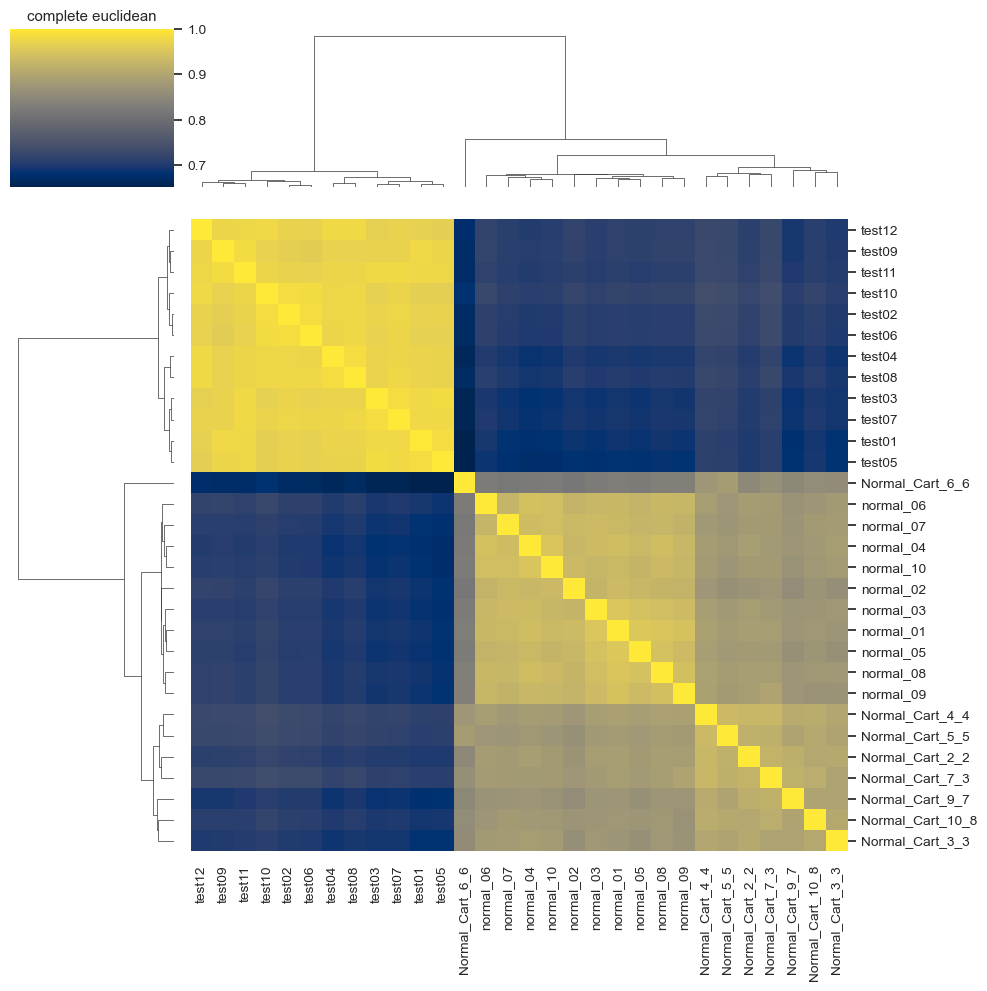

In [15]:
correlation = df_qn.corr(method='spearman')

# generate the figure with metabolite names
linkage_method = 'complete'
distance_metric = 'euclidean'

seaborn.set(font_scale=0.9)
seaborn.clustermap(correlation, cmap='cividis', col_cluster=True,
                   method=linkage_method, metric=distance_metric)

matplotlib.pyplot.title('{} {}'.format(linkage_method, distance_metric))
matplotlib.pyplot.tight_layout()


In [14]:
# plot distributions
# Quantile normalize
# plot distances
# show correlations between 2D and 3D and healthy ones.
# consider two boxplots with Spearman correlation coefficients